In [1]:
import torch
from PIL import Image
from diffusers import StableDiffusionImg2ImgPipeline, DPMSolverMultistepScheduler, StableDiffusionPipeline,DiffusionPipeline

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
input_image_path = "../../../media/input_images/110.png"
input_image = Image.open(input_image_path)
print("Input Image Size: ", input_image.size)
input_image.show()

In [2]:
pipe = DiffusionPipeline.from_pretrained("SimianLuo/LCM_Dreamshaper_v7", custom_pipeline="latent_consistency_txt2img", custom_revision="main", revision="main")
pipe.to("cuda", torch.float32)
#pipe_fp16.scheduler = DPMSolverMultistepScheduler.from_config(pipe_fp16.scheduler.config)

/home/cilem/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
Loading pipeline components...:  50%|█████     | 3/6 [00:00<00:00,  6.92it/s]Some weights of StableDiffusionSafetyChecker were not initialized from the model checkpoint at /home/cilem/.cache/huggingface/hub/models--SimianLuo--LCM_Dreamshaper_v7/snapshots/c255dc8f16c927b2a6af52092a5ec17903b3a24a/safety_checker and are newly initialized: ['vision_model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]


LatentConsistencyModelPipeline {
  "_class_name": "LatentConsistencyModelPipeline",
  "_diffusers_version": "0.22.0.dev0",
  "_name_or_path": "SimianLuo/LCM_Dreamshaper_v7",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers_modules.git.latent_consistency_txt2img",
    "LCMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

100%|██████████| 50/50 [00:06<00:00,  8.04it/s]


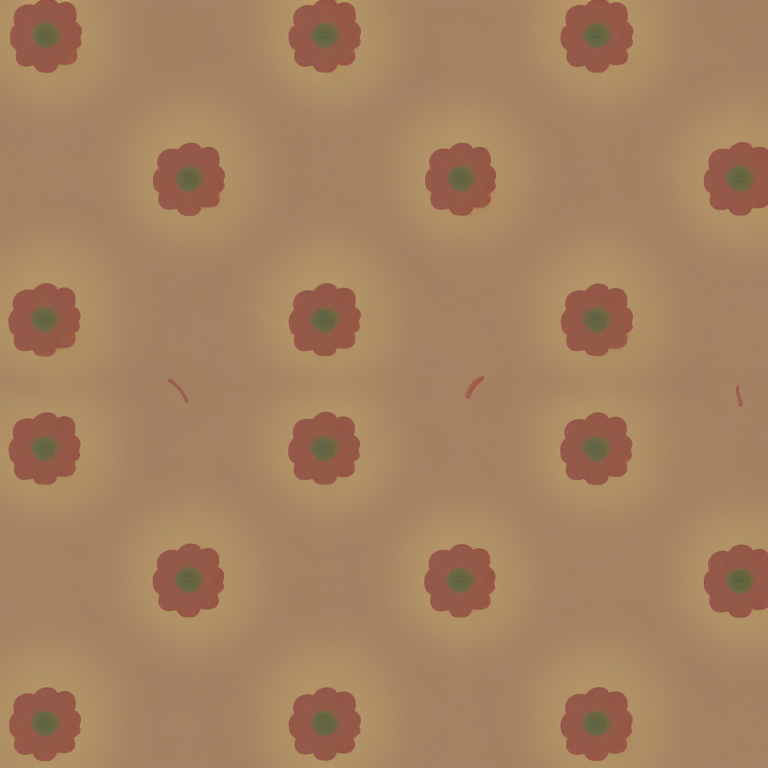

In [4]:
out_fp16 = pipe(
                prompt= "pink and red flowers pattern on yellow background, textile pattern, green leaves, high resolution",
                lcm_origin_steps=100,
                num_inference_steps=50,
                guidance_scale=8.0,
                ).images[0]

out_fp16.show()


In [ ]:
pipe_fp32 = StableDiffusionImg2ImgPipeline.from_pretrained("/home/sd_models/deliberate_v2")
pipe_fp32 = pipe_fp32.to("cuda", torch.float32)
pipe_fp32.scheduler = DPMSolverMultistepScheduler.from_config(pipe_fp32.scheduler.config)